# Graph Paths

[Intresting problem](https://binarysearch.com/problems/Shortest-Path-by-Removing-K-Walls)

## All path DFS

In [22]:
def allPathDFSUtils(graph, source, dest, visited, stack):
    visited[source] = True
    stack.append(source)
    if source == dest:
        print(stack)
    else:
        for neighbour in graph[source]:
            if not visited[neighbour]:
                allPathDFSUtils(graph, neighbour, dest, visited, stack) 
    stack.pop()
    visited[source] = False
    
def allPathsDFS(graph, source, dest):
    stack = []
    visited = [False for i in range(len(graph))]
    allPathDFSUtils(graph, source, dest, visited, stack)


graph = [[1, 2], [0, 3], [3, 4, 0], [1, 2, 4, 5], [3, 5, 2], [4, 3]]
n = 6
allPathsDFS(graph, 0, 5)

[0, 1, 3, 2, 4, 5]
[0, 1, 3, 4, 5]
[0, 1, 3, 5]
[0, 2, 3, 4, 5]
[0, 2, 3, 5]
[0, 2, 4, 3, 5]
[0, 2, 4, 5]


## Shortestpath using BFS

In [18]:
# NOTICE: here no need for visited because if you go back from where u came you increase distance, and  we ain't doing that.
graph = [[1, 2], [0, 3], [3, 4, 0], [1, 2, 4, 5], [3, 5, 2], [4, 3]]
n = 6; inf = int(1e10)
start = 0
from collections import deque
dis = [inf]*n
dis[start] = 0
q = deque([start])
while q:
    node = q.popleft()
    for i in graph[node]:
        if dis[i]>dis[node]+1:
            dis[i] = dis[node]+1 
            q.append(i)
print(dis)

[0, 1, 1, 2, 2, 3]


## 0-1 BFS

Since there are only two possiblities for weigths, therefore we use dequeue, push the  
edges with 0 weights on left side while edges with 1 weigths to right side of the queue. 
This way queue remains as if a heap.

[Example problem](https://leetcode.com/problems/minimum-cost-to-make-at-least-one-valid-path-in-a-grid/)

In [2]:
from collections import deque

def minCost(grid: list) -> int:
    n, m = len(grid), len(grid[0])
    inf = float('inf')
    def valid(x, y): 
        return (0<=x<n) and (0<=y<m)

    def nextmove(x, y, i):
        if i == 1: return x, y+1
        if i == 2: return x, y-1
        if i == 3: return x+1, y
        if i == 4: return x-1, y

    dis = [[inf]*m for i in range(n)]
    q = deque([(0, 0, 0)])
    dis[0][0] = 0

    while q:
        d, x, y = q.popleft()
        for i in range(1, 5):
            a, b = nextmove(x, y, i)
            w = 1*(grid[x][y] != i)
            if valid(a, b) and dis[a][b]>d+w:
                dis[a][b] = d+w
                if w: q.append((dis[a][b], a, b))
                else: q.appendleft((dis[a][b], a, b))

    return dis[-1][-1]

grid = [[1,1,1,1],
        [2,2,2,2],
        [1,1,1,1],
        [2,2,2,2]]

minCost(grid)

3

## Simultaneous BFS

In nomral BFS, traversal is level by level, but while traversal nodes never know if the neighbour was visited in current level or previous levels, so to track such information we mark the current level nodes differently and once the level is finished we mark them completely.

[Problem Moo, Google](https://binarysearch.com/problems/Moo)

In [2]:
from collections import deque

def Moo(cows):
    cows = list(cows)
    n = len(cows)
    q = deque()
    for i, v in enumerate(cows):
        if v != '@':
            q.append((i, v))

    while q:
        s = len(q)
        r, l = [], []
        con = set()

        # get the nodes from which current level will be traversed
        while s:
            i, m = q.popleft()
            if m == 'R': r.append((i, m))
            else: l.append((i, m))
            s-=1

        # first mark the right moves but not as final.
        for i, m in r:
            if i+1<n and cows[i+1] == '@':
                cows[i+1] = 'R_'
                con.add((i+1, m))

        # if a left moves encounters a intermideate right move then both are invalid moves
        for i, m in l:
            if i-1<0: continue
            if cows[i-1] == '@':
                cows[i-1] = 'L'
                con.add((i-1, m))
            elif cows[i-1] == 'R_':
                con.discard((i-1, 'R'))
                cows[i-1] = '@'

        # all valid moves are stored in a set, so once level finishes append those move in q
        for i, m in list(con):
            if cows[i] == 'R_':
                cows[i] = 'R'
            q.append((i, m))

    return "".join(cows)

cows = "@L@R@@@@L"
ans = Moo(cows)
print(ans)

LL@RRRLLL


## Count Number of Paths of length K to reach from Src to Dst

Solution: If you are given a adjancy matrix A, then to we can count number of paths to reach  
from Src to Dst just by getting value of $A^K[src][dst]$.  
When we multiply A to itself, suppose we take row `src` and mutliply it by column `dst`  
what we are doing is actually gettting those node from `src` to some node `p` and from `p`  
to `dst` and adding them up.  
eg:  
nodes---------`= [n1, n2, n3, n4, n5, n6]`  
row------`src = [0,   0,  1,  1,  0, 1]`  
column--`dst = [0,   1,  1,  0,  0, 1]`  

$row * column = 0*0 + 0*1 + 1*1 + 1*0 + 0*0 + 1*1 = 2$  
this way we have calculated path length of 2 from src to dst, if we keep on doing it, we will get answer for k.

Problem:  
There is a simple directed graph G with N vertices, numbered 1,2,…,N.

For each i and j (1≤i,j≤N), you are given an integer a 
i,j
​
  that represents whether there is a directed edge from Vertex i to j. If a 
i,j
​
 =1, there is a directed edge from Vertex i to j; if a 
i,j
​
 =0, there is not.

Find the number of different directed paths of length K in G, modulo 10 
9
 +7. We will also count a path that traverses the same edge multiple times.

In [3]:
#from debug import *

mod = int(1e9) + 7

n, k = 10, 1000000000000000000
graph = [[0, 0, 1, 1, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 1, 1, 1, 0, 0], [0, 1, 0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 1, 0, 1, 1, 0, 1, 1, 0], [0, 1, 1, 1, 0, 1, 0, 1, 1, 1], [0, 0, 0, 1, 0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 1, 0, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 1, 1, 1, 0, 1, 1, 1, 0]]


def solve(n, k, graph):
    def matmul(A, B):
        n = len(A)
        ans = [[0]*n for i in range(n)]

        for i in range(n):
            for j in range(n):
                for k in range(n):
                    ans[i][j] = (ans[i][j] + A[i][k] * B[k][j])%mod
        return ans

    def matpow(A, k):
        n = len(A)
        if k == 0:
            ans = [[0]*n for _ in range(n)]
            for i in range(n):
                ans[i][i] = 1
            return ans
        elif k&1:
            return matmul(A, matpow(A, k-1))
        else:
            A_half = matpow(A, k//2)
            return matmul(A_half, A_half)

    A = matpow(graph, k)
    ans = 0
    for row in A:
        ans = (ans + sum(row))%mod

    print(ans)
    
solve(n, k, graph)

957538352


## Clone a graph

In [2]:
class UndirectedGraphNode:
    def __init__(self, label):
        self.label = label
        self.neighbors = []


def cloneGraph(self, node):
    d = dict()

    def dfs(node):
        q = id(node)
        clone = UndirectedGraphNode(node.label)
        d[q] = clone

        for nbr in node.neighbors:
            w = id(nbr)
            # if not visited clone it
            if w not in d:
                clone_nbr = dfs(nbr)
            # else retrive it
            else:
                clone_nbr = d[w]
            clone.neighbors.append(clone_nbr)

        return clone

    return dfs(node)


## Dijkstra

In [11]:
# NOTICE: here no need for visited because if you go back from where u came you increase distance,
# and we ain't doing that.
from heapq import *
graph = [[(1, 1), (2, 3)], [(0, 1), (3, 2)], [(3, 3), (4, 2), (0, 3)],
         [(1, 2), (2, 3), (4, 4), (5, 4)], [(3, 4), (5, 1), (2, 2)], [(4, 1), (3, 4)]]
n = 6; inf = int(1e10)
dis =[inf]*n
start = 0
dis[start] = 0
q = [(0, start)]
while q:
    d, node = heappop(q)
    for i in graph[node]:
        nn, w = i
        if dis[nn]>d+w:
            dis[nn] = d+w
            heappush(q, (dis[nn], nn))
print(dis)

[0, 1, 3, 3, 5, 6]


## Bellmon-Ford

Any simple path will have max of V-1 node. So if we relax all edges V-1 times path should be minimum.  
If no negetive cycle then Vth iteration does't relax.

In [20]:
# code
graph = [[(1, 1), (2, 3)], [(0, 1), (3, 2)], [(3, 3), (4, 2), (0, 3)], [(1, 2), (2, 3), (4, 4), (5, 4)], [(3, 4), (5, 1), (2, 2)], [(4, 1), (3, 4)]]
n = 6; inf = int(1e10)
dis =[inf]*n
start = 0
dis[start] = 0

for _ in range(n-1):
    for i in range(len(graph)):
        for j in graph[i]:
            nn, w = j
            if dis[nn]>dis[i]+w: dis[nn] = dis[i]+w
x = 0
for i in range(len(graph)):
    for j in graph[i]:
        nn, w = j
        if dis[nn]>dis[i]+w: x = 1; break
print(dis)
print(x)

[0, 1, 3, 3, 5, 6]
0


## Floyd Warshall

Idea: for evey kth node assume it to be intermediate point of ith and jth node(This is strict). Perform relaxation

In [21]:
graph = [[(1, 1), (2, 3)], [(0, 1), (3, 2)], [(3, 3), (4, 2), (0, 3)], [(1, 2), (2, 3), (4, 4), (5, 4)], [(3, 4), (5, 1), (2, 2)], [(4, 1), (3, 4)]]
n = 6; inf = int(1e10)
dis = [[inf if i != j else 0 for j in range(n)] for i in range(n)]
# converting into adjancy matrix
for i in range(len(graph)):
    for nn, w in graph[i]:
        dis[i][nn] = w
# first k than i than j. Its is strictly like this. other wise wrong answer.
for k in range(n):
    for i in range(n):
        for j in range(n):
            dis[i][j] = min(dis[i][j], dis[i][k]+dis[k][j])
for i in dis: print(i)

[0, 1, 3, 3, 5, 6]
[1, 0, 4, 2, 6, 6]
[3, 4, 0, 3, 2, 3]
[3, 2, 3, 0, 4, 4]
[5, 6, 2, 4, 0, 1]
[6, 6, 3, 4, 1, 0]


## A Star

In Dijkstra, we pick the nodes based on current minimum distance, but in A Star we also consider wihch Node is closest to destination.

H = estimated/Heuristic distance
G = Current distance
F = H + G

Priority in heap: (F, G, current_Node)

In [2]:
from heapq import *

from time import sleep
from IPython.display import clear_output, display

mv = [0, 1, 0, -1, 0]

def Astar(grid, src, dst):
    n, m = len(grid), len(grid[0])
    def valid(x, y):return (0<=x<n) and (0<=y<m)
    # Manhattan distance
    def Heuristic(a, b):return abs(a[0] - b[0]) + abs(a[1] - b[1])
    
    dis = [[1e20]*m for i in range(n)]
    sx, sy = src
    dx, dy = dst
    dis[sx][sy] = 0
    cnt = 0
        
    #        F =      H      +     G,                     G,         Node
    heap = [(Heuristic((sx, sy), dst) + dis[sx][sy], dis[sx][sy], (sx, sy))]
    while heap:
        f, g, node = heappop(heap)
        x, y = node
        grid[x][y] = '*'
        cnt += 1
        
        print("A Star")
        print("steps: ", cnt)
        for r in grid:
            print(*r)
        clear_output(wait=True)
        sleep(0.25)
        
        if node == dst: break
        
        for i in range(4):
            a, b = x+mv[i], y+mv[i+1]
            if valid(a, b) and grid[a][b] != '#' and dis[a][b] > g + 1:
                dis[a][b] = g + 1
                heappush(heap, (Heuristic((a,b), dst)+g+1, g+1, (a,b)))
    return dis[dx][dy]

def BFS(grid, src, dst):
    n, m = len(grid), len(grid[0])
    def valid(x, y):return (0<=x<n) and (0<=y<m)
    
    dis = [[1e20]*m for i in range(n)]
    sx, sy = src
    dx, dy = dst
    dis[sx][sy] = 0
        
    heap = [(dis[sx][sy], (sx, sy))]
    cnt = 0
    while heap:
        g, node = heappop(heap)
        x, y = node
        cnt += 1
        grid[x][y] = '*'
        
        print("BFS/Dijkstra")
        print("steps: ", cnt)
        for r in grid:
            print(*r)
        clear_output(wait=True)
        sleep(0.25)
        
        if node == dst: break
        
        for i in range(4):
            a, b = x+mv[i], y+mv[i+1]
            if valid(a, b) and grid[a][b] != '#' and dis[a][b] > g + 1:
                dis[a][b] = g + 1
                heappush(heap, (g+1, (a,b)))
    return dis[dx][dy]



grid = [['.','s','.','.','.','.'],
        ['.','.','.','.','.','.'],
        ['.','#','.','#','#','.'],
        ['.','#','.','#','#','.'],
        ['.','#','.','.','#','.'],
        ['.','#','#','.','#','.'],
        ['.','#','#','.','#','.'],
        ['.','#','#','.','#','.'],
        ['.','.','.','d','.','.']]
                         
src, dst = (0, 0), (0, 0)
for i in range(len(grid)):
    for j in range(len(grid[0])):
        if grid[i][j] == 's':
            src = (i, j)
        elif grid[i][j] == 'd':
            dst = (i, j)

grid2 = [[*i] for i in grid]
ans = Astar(grid, src, dst)
ans = BFS(grid2, src, dst)
print(ans)

10


# MST

## Prims
Simple greedy.Take a node and find the edge with lowest weight.  
But if that edge has the other node already visited then don't take it and continue to other edge.  
Only mark visited if that node is out of queue. This is not BFS so don't make mistake of marking visited as as soon as you visit it.    
It may happend a node is already visited is inside queue becuase you are not inserting with respect of node but edges so simply ignore the visited nodes.  

In [3]:
from heapq import *
# graph = [[(1, 1), (2, 3)], [(0, 1), (3, 2)], [(3, 3), (4, 2), (0, 3)], [(1, 2), (2, 3), (4, 4), (5, 4)], [(3, 4), (5, 1), (2, 2)], [(4, 1), (3, 4)]]
ee  = [[0, 5, 7], [0, 2, 2], [0, 3, 5], [1, 5, 6], [1,2,3], [1,3,2], [3,4,4], [2,4,3]]
n = 6

graph = [[] for i in range(n)]

for i in ee:
    a, b, w = i
    graph[a].append([b, w])
    graph[b].append([a, w])

q = [(0, 0)]
v = [0]*n
cost = 0
while q:
    w, node = heappop(q)
    if v[node]: continue
    cost += w
    v[node] = 1
    for i, k in graph[node]:
        if not v[i]: heappush(q, (k, i))
print(cost)

16


## kruskal

Sort all edges in increasing order. take them one by one and if an edge does not add cyle to graph include it. and take only $v-1$ edges.

In [11]:
graph = [[(1, 1), (2, 3)], [(0, 1), (3, 2)], [(3, 3), (4, 2), (0, 3)], [(1, 2), (2, 3), (4, 4), (5, 4)], [(3, 4), (5, 1), (2, 2)], [(4, 1), (3, 4)]]
n = 6
parent = [-1]*n
edges = []

def find(x):
    if parent[x] == -1: return x
    parent[x] = find(parent[x])
    return parent[x]

for i in range(n):
    for node, w in graph[i]:
        edges.append((w, i, node))
edges.sort()
cnt = 0
ans = 0
for i in edges:
    if cnt == n-1: break
    w, a, b = i
    x = find(a)
    y = find(b)
    if x != y:
        ans += w
        parent[x] = y
        cnt+=1
print(ans)

9


# Topological sorting

Only for connected directed acyclic graph. Order of nodes such dirction of flow is always forward while iterating through list.

## Recursive Apporach

In [2]:
#code 1
# simple dfs in forward direction, and while falling back keep append the node in left of deque.
graph = [[], [2], [3], [], [0, 1], [0, 2]]
n = 6
from collections import deque
stack = deque()
v = [0]*n
def dfs(node):
    v[node] = 1
    for i in graph[node]:
        if not v[i]: dfs(i)
    stack.appendleft(node)

for i in range(n):
    if not v[i]: dfs(i)
print([*stack])

[5, 4, 1, 2, 3, 0]


## Queue Apporach

In [9]:
#code 2
# start traversing from all nodes with 0 indegree using bfs. and only when reached some node reduce its indegree by 1. 
# if indegree is 0 then append
# in q, whenever poping from q append that node to ans.
# if asked in sorted order just make a min heap.
# no need of visited!!

from collections import deque
from heapq import *

n = 5
edges = [[1,4],[2,4],[3,1],[3,2]]
indeg = [0]*(n+1)
q = []  # normally its a deque, but here we need lexographically min, so just use a min heap.

for u, v in edges:
    graph[u].append(v)
    indeg[v] += 1

# queue technique
for i in range(1, n+1):
    if indeg[i] == 0:
        heappush(q, i)

ans = []
while q:
    node = heappop(q)
    ans.append(node)

    for nbr in graph[node]:
        indeg[nbr] -= 1
        if indeg[nbr] == 0:
            heappush(q, nbr)
print(*ans)

3 1 2 4 5


## Another way

In [17]:
def toposort(graph):
    n = len(graph)
    res, visited = [], [0]*n
    stack = list(range(1, n))
    
    # like eularian path, its an iterative way to perform a dfs
    while stack:
        node = stack.pop()
        # here we have to mark that a paricular node's all neighbours are traversed
        # earlier, and so we can push this node into our result.
        # using '~' operator which inverts bits, it make sure that we get a negetive value
        # which is helpful in marking a node. this inversion help to mark 0 to sa ~0 = -1.
        # so rather than just using a - operator which will fail to mark 0 value, use ~.
        if node<0:
            res.append(~node)  
        elif visited[node] == 0:
            # if neighbour not visited put the current node as marked into stack
            # and all its neighbour and unmarked into the stack.
            visited[node] = 1
            stack.append(~node)
            stack += graph[node]
            
    # now res has reverse topological sorted order
    # so the first value is like a leaf or a sink, therefore its neighbour 
    # should not be visited or exits.
    # if it does it means there is a cycle, otherwise make the visited value
    # 0 to make it marked for the rest of the nodes.
    for node in res:
        if any(visited[nbr] for nbr in graph[node]):
            print("found cycle")
            return -1
        visited[node] = 0
    
    return res[::-1]

graph = [[], [2], [3], [], [0, 1], [0, 2]]
ans = toposort(graph)
print(ans)

[4, 0, 1, 5, 0, 2, 3]


# Cycle Detection

## CD in directed graph

Color technique is good enough.  
But topological technique works also cause topological sorting is only in DAC so if not in topo. order then not DAC.

### Color technique

In [48]:
#code
graph = [[1, 2], [0, 3], [3, 4, 0], [1, 2, 4, 5], [3, 5, 2], [4, 3]]
n = 6
color = [0]*n
def dfs(graph, color, node):
    color[node] = 1
    for i in graph[node]:
        if color[i] == 1: return 1
        elif color[i] == 0 and dfs(graph, color, i): return 1
    color[node] = 2
    return 0
ans = 0
for i in range(n):
    if dfs(graph, color, i): ans = 1; break
print(ans) # if cycle print 1 else 0

1


### Toposort technique with queue

If there is a cyle then those nodes doesn't have 0 indegree and will not come in queue and therefore not get subtracted  
while popping from queue.

In [10]:
from collections import deque

n = 3
edges = [[0, 1], [1, 2], [2, 1]]

# queue technique
graph = [[] for i in range(n)]
indeg = [0]*n
q = deque()
count = n

for u, v in edges:
    graph[v].append(u)
    indeg[u] += 1

for node in range(n):
    if indeg[node] == 0:
        q.append(node)

while q:
    node = q.popleft()
    print(node)
    count -= 1  # keep subtracting the node count, finall it must be zero to cover all the node

    for nbr in graph[node]:
        indeg[nbr] -= 1
        if indeg[nbr] == 0:
            q.append(nbr)

print(count == 0) # count must be zero for no cycle, otherwise some node is still left

False


### Toposort thechnique with stack

Exploit the property of toplogical sorting that every edge is always directing in forward direction of topoligcal sorted order.

In [6]:
n = 3
edges = [[0, 1], [1, 2], [2, 1]]

def solve(n, edges):
    graph = [[]*n for _ in range(n)]
    for u, v in edges:
        graph[u].append(v)
    
    stack = []
    visited = [0]*n
    def dfs(node):
        visited[node] = 1
        for nbr in graph[node]:
            if not visited[nbr]:
                dfs(nbr)
        stack.append(node)

    dfs(0)
    stack.reverse()

    # iterate over all the edges and check if all of them direct forward.
    # an edge u --> v must have its index[u] < index[v] in toposort order.
    index = [0]*n
    for i, x in enumerate(stack):
        index[x] = i

    for u, v in edges:
        if index[u] > index[v]:
            return "There is a cycle"

    return "There ain't any cycle"


print(solve(n, edges))

There is a cycle


## CD in Undirected graph

### Color technique
Same as in directed just don't consider the parent path.

In [4]:
#code
graph = [[1, 2], [0, 3], [3, 4, 0], [1, 2, 4, 5], [3, 5, 2], [4, 3]]
n = 6
color = [0]*n
def dfs(node, p):
    color[node] = 1
    for i in graph[node]:
        if i == p: continue
        if color[i] == 1: return 1
        if color[i] == 0 and dfs(i, node):  return 1
    color[node] = 2
    return 0
ans = 0
for i in range(n):
    if dfs(i, -1): ans = 1; break
print(ans) # if cycle print 1 else 0

1


### Disjoint Set technique
Go through each edge and while traversing find the node current set and if it is already in its ancestor's set there is a cycle. else union them.

In [8]:
graph = [[1, 2], [0, 3], [3, 4, 0], [1, 2, 4, 5], [3, 5, 2], [4, 3]]
n = 6
parent = [-1]*n
def findParent(node):
    if parent[node] == -1: return node
    parent[node] = findParent(parent[node])
    return parent[node]
    
ans = 0
for i in range(n):
    for j in graph[i]:
        x, y = findParent(i), findParent(j)
        if x == y: ans = 1; break
        else: parent[x] = y # unionParent(x, y)
print(ans)

1


# strongly Connnectivity - Kosaraju

An undirected graph is always strongly connected unless its a forest.  
This is mainly for directed graph.  

If only to find strongly connectivity, just do a dfs in normal graph and then do a dfs from same point in reverse graph if both time all nodes visited then strongly connect else not.  
The idea is, if every node can be reached from a vertex v, and every node can reach v, then the graph is strongly connected.  

## Is Strongly connected ?

In [1]:
graph = [[], [2], [3], [], [0, 1], [0, 2]]
n = 6
matrix = [[0 for _ in range(n)] for _ in range(n)]
for i in range(n):
    for j in graph[i]:
        matrix[i][j] = 1
t_graph = [[] for _ in range(n)]
for j in range(n):
    for i in range(n):
        if matrix[j][i] == 1: graph[j].append(i)

v = [False]*n
def dfs(graph, node):
    v[node] = True
    for i in graph[node]:
        if not v[i]: dfs(graph, i)

dfs(graph, 0)
ans = True
for i in v: ans = ans and i
if ans:
    v = [False]*n
    dfs(t_graph, 0) 
    for i in v: ans = ans and i
print(ans)

False


## Finding Stronly connected components

First do a forward dfs and store the processed points in stack, basically get the topological sorting. This way you make sure that when traversing reverse graph you don't go into other connected components.  
eg. sub-graph A is strongly connect and sub-graph B is strongly connected in themselves.  
and they have structure like this $$A->B$$ A connect to B.  
Now in topological order A comes first so processed list will be A then B.
but in reverse graph you can not go from A to B. because now $$A<-B$$
so A get isolated from B becuase you are in topological order which is A and B. Now A is strongly connected so traverse in A and print them and then do it for B.

In [ ]:
n, m = map(int ,sys.stdin.readline().split())
graph = [[] for i in range(n)]
trans = [[] for i in range(n)]

for i in range(m):
    a,b = map(int, sys.stdin.readline().split())
    graph[a-1].append(b-1)
    trans[b-1].append(a-1)

stack = []
v = [0]*n
comp = []

def dfs1(node):
    v[node] = 1
    for i in graph[node]:
        if not v[i]: dfs1(i)
    stack.append(node)


def dfs2(node):
    v[node] = 1
    comp.append(node)
    for i in trans[node]:
        if not v[i]: dfs2(i)

for i in range(n):
    if not v[i]: dfs1(i)
v = [0]*n
ans = []
stack.reverse()
for i in stack:
    if not v[i]:
        dfs2(i)
        if comp:
            ans.append(comp[-1]+1)
        if len(ans)>=2:
            print("NO")
            print(ans[1], ans[0])
            break
print("YES")

# Atriculation points

Articulation points only occurs when there are no backedges connecting differents graph. To keep track of these backedges we create two arrays.
discovery array and lowest time array. discovery array keeps the track of DFS traversal time of graph while lowest time array keeps the track of those components which are connect via some back edge. Threrefore the lowest time array is always the minimum discovery time of the connected componnents with the first backedge.

video [link](https://www.youtube.com/watch?v=jFZsDDB0-vo) for better explanation.

In [11]:
#code
graph = [[1, 2, 3, 5],[0],[0, 3],[0, 2, 4],[3],[0]]

n = len(graph)
dis = [0]*n
low = [1e10]*n
ans = []
root = time = 0

def dfs(node, parent=-1):
    global time, ans
    time += 1  # its discovery time wrt to dfs tree.
    dis[node] = low[node] = time
    child = 0 

    for nb in graph[node]:
        # we cannot go to parent
        if nb == parent: continue
        if dis[nb] == 0:
            child += 1 # counting only those child who are not visited yet from the sub-graph
            dfs(nb, node)
            low[node] = min(low[node], low[nb])
            
            # if a graph makes 8 figure, then the center node have same time as its sub graph, therefore equlity matter
            # since removing the node will disconnect the two zeros for 8 shape
            if parent != -1 and low[nb]>=dis[node]: # checking parent because it will add multiple time otherwise.
                ans.append(node)
        else:
            low[node] = min(low[node], dis[nb])
    
    # since its the count of those childs which cannot be access from other sub graphs, therefore greater than 1
    # means only root connects the sub graphs
    if parent == -1 and child>1: ans.append(node)

dfs(root)
print(ans)

[3, 0]


# Bridge

To find a bridge, we need to make sure that the articulation point is connect to the other graph component via an edge and is not a part of it.
So we only have change that '>=' to '>' in the condition. This makes sure that the discovery time of node is at least one unit apart from the lowest time of its child which is only possible when there is only one edge connecting the articuation point to the other graph component.

In [14]:
#code
graph = [[1, 2, 3, 5],[0],[0, 3],[0, 2, 4],[3],[0]]
n = len(graph)
dis = [0]*n
low = [1e10]*n
ans = []
time = 0
def dfs(node, parent=-1):
    global time, ans
    time += 1
    dis[node] = low[node] = time
    # we don't care about child because we are counting 
    for nb in graph[node]:
        # we cannot go to parent
        if nb == parent: continue
        if dis[nb] == 0:
            dfs(nb, node)
            low[node] = min(low[node], low[nb])
            
            # in figure 8, the center node is articulatioin point but, removing any edges from it doesn't disconnected the graph.
            # for an edge to be bridge, low time must be greater than disconvery time.
            if low[nb]>dis[node]:
                ans.append((node, nb))
        else:
            low[node] = min(low[node], dis[nb])

dfs(0)
print(ans)

[(0, 1), (3, 4), (0, 5)]


# Max-Flow Graph

Make graph from dict it would be easy.  
Graph format:
~~~~
graph = {
            Node: {
                    neighbours: [flow, capacity],
                  }
        }
~~~~
while making graph do make a reverse edge for every edge with 0 ***capacity*** and 0 ***flow***.
Idea is to find a path with positive flow, then add that flow to ans(flow is minimum ***capacity - flow*** in path) and add flow to ***flow*** of original edges in path and subtract flow from ***flow*** of reverse edge. Keep doing this until no path left with positive flow.  
To find path you can use DFS and BFS. But BFS recommended.


In [ ]:
#code
from collections import deque
import sys; # input = sys.stdin.readline
inf = int(1e18)
n, m = map(int, input().split())
start, dest = 1, n
graph = dict()
for _ in range(m):
    a, b, c = map(int, input().split())
    # making graph
    if a in graph:
        if b in graph[a]: graph[a][b][1] += c
        else: graph[a][b] = [0, c]
    else: graph[a] = dict(); graph[a][b] = [0, c]
    #making reverse edges
    if b in graph: graph[b][a] = [0, 0]
    else: graph[b] = dict(); graph[b][a] = [0, 0]

# path finding BFS...
def bfs(node, visited):
    parent = [-1]*(n+1)
    # q stores node and min-flow during path finding.
    # intitally min flow is inf.
    q = deque([(node, inf)])
    visited[node], re = True, False
    while q:
        node, c = q.popleft()
        # if dest found Break.
        if node == dest: re = True; break
        for k, v in graph[node].items():
            # checking if flow positive. this works with negetive flow too, cause reverse edge have 0 capacity, so 0-(neg no) = positive no.
            if not visited[k] and v[1] - v[0] > 0:
                visited[k] = True
                parent[k] = node
                q.append((k, min(c, v[1] - v[0])))
    # tracing back to update flows.
    if re:
        while node != -1:
            p = parent[node]
            if p == -1: break
            graph[p][node][0] += c
            graph[node][p][0] -= c
            node = p
    return re, c  # If re is true, means got some path, c is flow of that path.
 
val, ans = True, 0
while val:
    # while you get flow keep adding to ans.
    v = [False]*(n+1)
    val, flow = bfs(start, v)
    if val: ans += flow
print(ans)

# Connectivity

1. Edge connectivity - The edge connectivity λ of the graph G is the minimum number of edges that need to be deleted, such that the graph G gets disconnected.  
2. Vertix connectivity - The vertex connectivity κ of the graph G is the minimum number of vertices that need to be deleted, such that the graph G gets disconnected.  

The Whitney inequalities (1932) gives a relation between the edge connectivity λ, the vertex connectivity κ and the smallest degree of the vertices δ:
$$ κ≤λ≤δ $$

# Tree

## Binary Lifting

Idea is to store the parent of nodes in a logrithmic tabular fashion(like sparse table).  
$up[i][k]$ stores the parent of $i_{th}$ node which is $2^k$ nodes above it.  
It uses idea of dp to achive it.  
following is the dp recursion.  
$$up(v, k) = p$$
$$up(\frac{v}{2}, k-1) = p$$
$$\frac{v}{2} = up(v, k-1)$$
so  
$$up(v, k) = up(up(v, k-1), k-1)$$  

Also as you traverse from a root using dfs, then in dfs tree ancestor always comes before child and exits after child.  
So maintain *in* and *out* list for nodes using a *timer* variable, this will come handy to know if *v* is ancestor of *u* or not.

In [13]:
#verified against cses
from math import ceil, log2
graph = [[], [2, 3, 5], [1, 6, 7], [1, 4, 9], [3], [1, 8], [2], [2], [5], [3, 10], [9]]
n = len(graph)

N = n + 1
K = 1 +  ceil(log2(n))

up = [[-1]*K for i in range(N)]
inn = [0]*N
out = [0]*N

def disUp(node: int, r: int) -> int:
    if r<=0: return node
    if r>=2**K or node == -1: return -1
    e = int(log2(r))
    return disUp(up[node][e], r-(2**e))

def isAncestor(u: int, v: int) -> bool:
    if u == -1 or v == -1: return True
    return (inn[u]<=inn[v]) and (out[u]>=out[v])

def LCA(u: int, v: int) -> int:
    if isAncestor(u, v): return u
    if isAncestor(v, u): return v
    
    for k in reversed(range(K)):
        if not isAncestor(up[u][k], v):
            u = up[u][k]
    
    return up[u][0]

def dfs(node: int, parent: int, time: int) -> int:
    time += 1
    inn[node] = time
    up[node][0] = parent
    
    for k in range(1, K):
        if up[node][k-1] == -1: break
        up[node][k] = up[up[node][k-1]][k-1]
    
    for nbr in graph[node]:
        if nbr == parent: continue
        time = dfs(nbr, node, time)
    
    time += 1
    out[node] = time
    return time
    
dfs(1, -1, 0)
queriesForLCA = [(7, 2), (7, 6), (3, 9), (4, 2), (10, 2), (3, 7), (6, 1), (9, 8), (3, 3), (1, 3)]
queriesKthAnc = [(7, 2), (7, 6), (3, 9), (4, 2), (10, 2), (3, 7), (6, 1), (9, 8), (3, 3), (1, 3)]

ans = []
for u, v in queries:
    ans.append(LCA(u, v))
print(*ans)

ans = []
for u, k in queries:
    ans.append(disUp(u, k))

print(*ans)

2 2 3 1 1 1 1 1 3 1
1 -1 -1 1 3 -1 2 -1 -1 -1


## Tree Flattening : Efficient way to represent Sub-tree for queries.
Idea is that while doing dfs, a dfs tree only exits a node after traversing its sub graph, so maitain a time vairable(NOTE: This time variable is different than Binary lifting one. Here you only keep track of entering time and does not increase time while falling back).
Make a *start* and *end* list to store the start time and end time of the sub tree under that node.  
Now all the node in time span between start of node and end of node are sub-tree nodes of that node.  
~~~~
sub_tree = arr[start[b]: end[b]+1]
~~~~

In [4]:
#code
# used 1-based indexing
n = 7
graph = [[], [2, 3], [4, 5], [6, 7], [], [], [], []]
arr = [0]*(n+1)
start = [0]*(n+1)
end = [0]*(n+1)
root = 1
def dfs(node, time=1):
    arr[time] = node
    start[node] = time
    for i in graph[node]:
        time = dfs(i, time+1)
    end[node] = time
    return time
dfs(root)
print(start)
print(end)
print(arr)
# sub-tree nodes of a node b is arr[start[b]: end[b]+1]

[0, 1, 2, 5, 3, 4, 6, 7]
[0, 7, 4, 7, 3, 4, 6, 7]
[0, 1, 2, 4, 5, 3, 6, 7]


## Common ancestor in a binary tree - Elegent method.

Idea is that common ancestor will have both of given nodes in its subtree. So keep returning node if it is in the subtree else return None.
Now if a node contains one of element it will return Some node, else it will return None, and if both its node return that node.

In [5]:
# very optimized technique to get common ancestor.
def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
    if root in (None, p, q): return root # we got p or q
    left = self.lowestCommonAncestor(root.left, p, q)
    right= self.lowestCommonAncestor(root.right, p, q)
    return root if left and right else left or right
#     if left is None and right is None: return None
#     if left is not None and right is not None: return root
#     return left if left else right

# Eularian Circuit and graphs

Circuits are complete in the sense that the don't have constraint of having fixed source and sink. This is not true for E-graph they have one fixed source and sink.  

In [ ]:
# verified against cses
n,m = map(int, input().split())
graph = [set() for _ in range(n)] #using set for faster removal of edges.
for _ in range(m):
    a,b = map(int, input().split())
    graph[a-1].add(b-1)
    graph[b-1].add(a-1)

g = 0
# simple check for degree to be even.
# if directed graph make indeg and outdeg list and they should have equal values.
for i in graph:
    if len(i)%2:
        g = 1
        break
if g:
    print("IMPOSSIBLE")
else:
    # when node from stack have no edges left append it in answer, else visit that node and remove that edge.
    stack = [0]
    path = []
    while stack:
        node = stack[-1]
        if len(graph[node]) == 0:
            path.append(node+1)
            stack.pop()
        else:
            nn = graph[node].pop()
            graph[nn].remove(node)
            stack.append(nn)
    if len(path) == m+1:
        print(*path)
    else:
        print("IMPOSSIBLE")

# Drawing graph

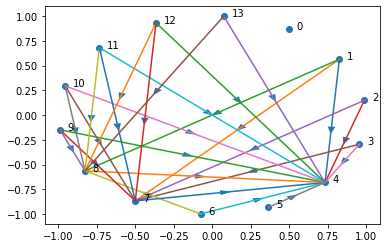

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n = 14
edge = [[12,8],[2,4],[3,7],[6,8],[11,8],[9,4],[9,7],[12,4],[11,4],[6,4],[1,4],[10,7],[10,4],[1,7],[1,8],[2,7],[8,4],[10,8],[12,7],[5,4],[3,4],[11,7],[7,4],[13,4],[9,8],[13,8]]
graph = [[] for i in range(n)]

for u, v in edge:
    graph[u].append(v)

# graph = [[], [2, 0], [3], [4], [], [4]]
def plotGraph(graph):
    no_node = len(graph)
    nodeX = []
    nodeY = []
    for i in range(no_node):
        value = np.exp(-2j*np.pi*i/no_node)
        value *= np.exp(1j*np.pi/3)
        x, y = np.real(value), np.imag(value)
        nodeX.append(x)
        nodeY.append(y)
    plt.scatter(nodeX, nodeY)
    delta = 0.01
    for i in range(len(graph)):
        plt.text(nodeX[i]+0.05, nodeY[i], "{}".format(i))
        for j in (graph[i]):
            plt.plot([nodeX[i], nodeX[j]],[nodeY[i], nodeY[j]])
            slope = (nodeY[j]-nodeY[i])/(nodeX[j]-nodeX[i])
            direction = -(nodeX[i]-nodeX[j])/abs(nodeX[i]-nodeX[j])
            plt.arrow((nodeX[i]+nodeX[j])/2,(nodeY[i]+nodeY[j])/2, direction*delta, direction*delta*slope, shape='full', lw=0, length_includes_head=True, head_width=.05)
    plt.show()
    
plotGraph(graph)